The 1st&3rd figure-top        panel equal to 1st&2nd panel
The 1st&3rd&4th figure-bottom panel equal to 1st&2nd&3rd panel
of Fig3 from NMR paper: https://openreview.net/pdf?id=TVnkjz4MqV

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

global_min = 0
global_max = 1
matrix_C = 'viridis'
cbar_size = 9
plt.rcParams.update({'font.size': 12, 'font.family': 'DejaVu Sans'})

NMR_Multi =   np.load('./data_NMR/Fig3_SU_Decode/nmr_M1.npz')
NER_Multi =   np.load('./data_NER/Fig5/NER_Multi.npz')
# CEBRA_Multi = np.load('./data_NER/Fig5/Cebra_Multi.npz') ## from NER, not-optimized
CEBRA_Multi =   np.load('./data_NMR/Fig3_SU_Decode/ceb_M1.npz')
# piVAE_Multi = np.load('./data_NER/Fig5/piVAE_Multi.npz') ## from NER, not-optimized
piVAE_Multi =   np.load('./data_NMR/Fig3_SU_Decode/piv_M1.npz')

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


dia nmr vs ner t-value: 6.7268 p-value: 2.0e-05 increase: 24%
dia ner vs cebra t-value: 4.0745 p-value: 3.0e-03 increase: 41%
off-dia nmr vs ner t-value: 10.4767 p-value: 6.7e-21 increase: 40%
off-dia ner vs cebra t-value: 5.1600 p-value: 1.6e-06 increase: 31%


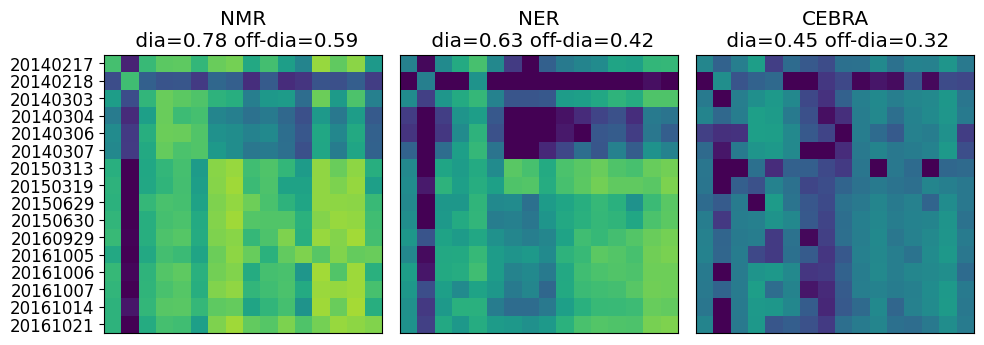

In [2]:
labels=np.unique(NMR_Multi['date_subjects'])
n_file = NMR_Multi['vel_R_2D'].shape[0]

fig = plt.figure(figsize=(10, 5))
ax = plt.subplot(131)
Mat_temp = NMR_Multi['vel_R_2D']
# print('NMR vel performance>>>', Mat_temp)
# print('NMR vel minimum>>>', np.min(Mat_temp))
im = ax.imshow(Mat_temp, cmap=matrix_C, interpolation='none', aspect='equal',
               vmin=global_min, vmax=global_max)
diagonal_values_nmr = np.diag(Mat_temp)
non_diagonal_values_nmr = Mat_temp[~np.eye(n_file, dtype=bool)]
dia = np.round(np.mean(diagonal_values_nmr), 2)
non_dia = np.round(np.mean(non_diagonal_values_nmr), 2)
ax.set_xticks([])
ax.set_yticks([])
plt.tight_layout()
# cbar = plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
# cbar.ax.tick_params(labelsize=cbar_size)
plt.yticks(ticks=np.arange(n_file), labels=labels)
ax.set_title('NMR\n dia='+str(dia)+' off-dia='+str(non_dia))

ax = plt.subplot(132)
Mat_temp = NER_Multi['vel_R_2D']
# print('NER vel performance>>>', Mat_temp)
# print('NER vel minimum>>>', np.max(Mat_temp))
im = ax.imshow(Mat_temp, cmap=matrix_C, interpolation='none', aspect='equal', vmin=global_min, vmax=global_max)
diagonal_values_ner = np.diag(Mat_temp)
non_diagonal_values_ner = Mat_temp[~np.eye(n_file, dtype=bool)]
dia = np.round(np.mean(diagonal_values_ner), 2)
non_dia = np.round(np.mean(non_diagonal_values_ner), 2)
ax.set_xticks([])
ax.set_yticks([])
plt.tight_layout()
# cbar = plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
# cbar.ax.tick_params(labelsize=cbar_size)
ax.set_title('NER\n dia='+str(dia)+' off-dia='+str(non_dia))

ax = plt.subplot(133)
Mat_temp = CEBRA_Multi['vel_R_2D']
# print('Cebra vel performance>>>', Mat_temp)
# print('Cebra vel minimum>>>', np.max(Mat_temp))
im = ax.imshow(Mat_temp, cmap=matrix_C, interpolation='none', aspect='equal', vmin=global_min, vmax=global_max)
diagonal_values_cebra = np.diag(Mat_temp)
non_diagonal_values_cebra = Mat_temp[~np.eye(n_file, dtype=bool)]
dia = np.round(np.mean(diagonal_values_cebra), 2)
non_dia = np.round(np.mean(non_diagonal_values_cebra), 2)
ax.set_xticks([])
ax.set_yticks([])
plt.tight_layout()
# cbar = plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
# cbar.ax.tick_params(labelsize=cbar_size)
ax.set_title('CEBRA\n dia='+str(dia)+' off-dia='+str(non_dia))

plt.savefig('./NMR_Figs_pdf/Fig3_decode_matrix_M1_3models.pdf')

t_stat_ME, p_val_ME = stats.ttest_rel(diagonal_values_nmr, diagonal_values_ner) 
diff = 100*(np.mean(diagonal_values_nmr)-np.mean(diagonal_values_ner))/np.mean(diagonal_values_ner)
print(f"dia nmr vs ner t-value: {t_stat_ME:.4f} p-value: {p_val_ME*3:.1e} increase: {diff:.0f}%")
t_stat_NC, p_val_NC = stats.ttest_rel(diagonal_values_ner, diagonal_values_cebra) 
diff = 100*(np.mean(diagonal_values_ner)-np.mean(diagonal_values_cebra))/np.mean(diagonal_values_cebra)
print(f"dia ner vs cebra t-value: {t_stat_NC:.4f} p-value: {p_val_NC*3:.1e} increase: {diff:.0f}%")

t_stat_ME, p_val_ME = stats.ttest_rel(non_diagonal_values_nmr, non_diagonal_values_ner) 
diff = 100*(np.mean(non_diagonal_values_nmr)-np.mean(non_diagonal_values_ner))/np.mean(non_diagonal_values_ner)
print(f"off-dia nmr vs ner t-value: {t_stat_ME:.4f} p-value: {p_val_ME*3:.1e} increase: {diff:.0f}%")
t_stat_NC, p_val_NC = stats.ttest_rel(non_diagonal_values_ner, non_diagonal_values_cebra) 
diff = 100*(np.mean(non_diagonal_values_ner)-np.mean(non_diagonal_values_cebra))/np.mean(non_diagonal_values_cebra)
print(f"off-dia ner vs cebra t-value: {t_stat_NC:.4f} p-value: {p_val_NC*3:.1e} increase: {diff:.0f}%")

dia nmr vs ner t-value: 6.7268 p-value: 2.7e-05 increase: 24%
dia ner vs cebra t-value: 4.0745 p-value: 4.0e-03 increase: 41%
off-dia nmr vs ner t-value: 10.4767 p-value: 8.9e-21 increase: 40%
off-dia ner vs cebra t-value: 5.1600 p-value: 2.1e-06 increase: 31%


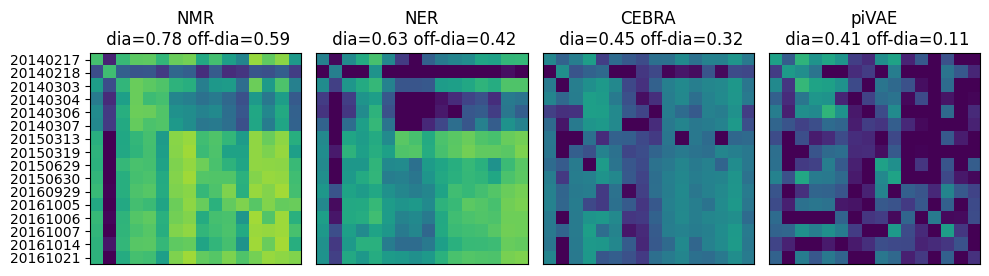

In [3]:
plt.rcParams.update({'font.size': 10, 'font.family': 'DejaVu Sans'})
labels=np.unique(NMR_Multi['date_subjects'])
n_file = NMR_Multi['vel_R_2D'].shape[0]

fig = plt.figure(figsize=(10, 5))
ax = plt.subplot(141)
Mat_temp = NMR_Multi['vel_R_2D']
# print('NMR vel performance>>>', Mat_temp)
# print('NMR vel minimum>>>', np.min(Mat_temp))
im = ax.imshow(Mat_temp, cmap=matrix_C, interpolation='none', aspect='equal',
               vmin=global_min, vmax=global_max)
diagonal_values_nmr = np.diag(Mat_temp)
non_diagonal_values_nmr = Mat_temp[~np.eye(n_file, dtype=bool)]
dia = np.round(np.mean(diagonal_values_nmr), 2)
non_dia = np.round(np.mean(non_diagonal_values_nmr), 2)
ax.set_xticks([])
ax.set_yticks([])
plt.tight_layout()
# cbar = plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
# cbar.ax.tick_params(labelsize=cbar_size)
plt.yticks(ticks=np.arange(n_file), labels=labels)
ax.set_title('NMR\n dia='+str(dia)+' off-dia='+str(non_dia))

ax = plt.subplot(142)
Mat_temp = NER_Multi['vel_R_2D']
# print('NER vel performance>>>', Mat_temp)
# print('NER vel minimum>>>', np.max(Mat_temp))
im = ax.imshow(Mat_temp, cmap=matrix_C, interpolation='none', aspect='equal', vmin=global_min, vmax=global_max)
diagonal_values_ner = np.diag(Mat_temp)
non_diagonal_values_ner = Mat_temp[~np.eye(n_file, dtype=bool)]
dia = np.round(np.mean(diagonal_values_ner), 2)
non_dia = np.round(np.mean(non_diagonal_values_ner), 2)
ax.set_xticks([])
ax.set_yticks([])
plt.tight_layout()
# cbar = plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
# cbar.ax.tick_params(labelsize=cbar_size)
ax.set_title('NER\n dia='+str(dia)+' off-dia='+str(non_dia))

ax = plt.subplot(143)
Mat_temp = CEBRA_Multi['vel_R_2D']
# print('Cebra vel performance>>>', Mat_temp)
# print('Cebra vel minimum>>>', np.max(Mat_temp))
im = ax.imshow(Mat_temp, cmap=matrix_C, interpolation='none', aspect='equal', vmin=global_min, vmax=global_max)
diagonal_values_cebra = np.diag(Mat_temp)
non_diagonal_values_cebra = Mat_temp[~np.eye(n_file, dtype=bool)]
dia = np.round(np.mean(diagonal_values_cebra), 2)
non_dia = np.round(np.mean(non_diagonal_values_cebra), 2)
ax.set_xticks([])
ax.set_yticks([])
plt.tight_layout()
# cbar = plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
# cbar.ax.tick_params(labelsize=cbar_size)
ax.set_title('CEBRA\n dia='+str(dia)+' off-dia='+str(non_dia))

ax = plt.subplot(144)
Mat_temp = piVAE_Multi['vel_R_2D']
im = ax.imshow(Mat_temp, cmap=matrix_C, interpolation='none', aspect='equal', vmin=global_min, vmax=global_max)
diagonal_values_pivae = np.diag(Mat_temp)
non_diagonal_values_pivae = Mat_temp[~np.eye(n_file, dtype=bool)]
dia = np.round(np.mean(diagonal_values_pivae), 2)
non_dia = np.round(np.mean(non_diagonal_values_pivae), 2)
ax.set_xticks([])
ax.set_yticks([])
plt.tight_layout()
# cbar = plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
# cbar.ax.tick_params(labelsize=cbar_size)
ax.set_title('piVAE\n dia='+str(dia)+' off-dia='+str(non_dia))
plt.savefig('./NMR_Figs_pdf/Fig3_decode_matrix_M1_4models.pdf')

t_stat_ME, p_val_ME = stats.ttest_rel(diagonal_values_nmr, diagonal_values_ner) 
diff = 100*(np.mean(diagonal_values_nmr)-np.mean(diagonal_values_ner))/np.mean(diagonal_values_ner)
print(f"dia nmr vs ner t-value: {t_stat_ME:.4f} p-value: {p_val_ME*4:.1e} increase: {diff:.0f}%")
t_stat_NC, p_val_NC = stats.ttest_rel(diagonal_values_ner, diagonal_values_cebra) 
diff = 100*(np.mean(diagonal_values_ner)-np.mean(diagonal_values_cebra))/np.mean(diagonal_values_cebra)
print(f"dia ner vs cebra t-value: {t_stat_NC:.4f} p-value: {p_val_NC*4:.1e} increase: {diff:.0f}%")

t_stat_ME, p_val_ME = stats.ttest_rel(non_diagonal_values_nmr, non_diagonal_values_ner) 
diff = 100*(np.mean(non_diagonal_values_nmr)-np.mean(non_diagonal_values_ner))/np.mean(non_diagonal_values_ner)
print(f"off-dia nmr vs ner t-value: {t_stat_ME:.4f} p-value: {p_val_ME*4:.1e} increase: {diff:.0f}%")
t_stat_NC, p_val_NC = stats.ttest_rel(non_diagonal_values_ner, non_diagonal_values_cebra) 
diff = 100*(np.mean(non_diagonal_values_ner)-np.mean(non_diagonal_values_cebra))/np.mean(non_diagonal_values_cebra)
print(f"off-dia ner vs cebra t-value: {t_stat_NC:.4f} p-value: {p_val_NC*4:.1e} increase: {diff:.0f}%")